In [160]:
import math, random
import numpy as np

import matplotlib.pyplot as plt

In [161]:
def generate_sales_data(num_rows):
  units_sold = np.random.randint(1, 1001, size=num_rows)  # Units sold (1 to 1000)
  average_rating = np.random.uniform(3.0, 5.0, size=num_rows)  # Average rating (3.0 to 5.0)
  is_top_seller = (units_sold > 500) & (average_rating > 4.0)  # Logical AND for thresholds
  labels = is_top_seller.astype(int)  # Convert boolean to 0 (False) or 1 (True)

  features = np.stack([units_sold, average_rating], axis=1)  # Combine features

  return features, labels

In [162]:
X_train, y_train = generate_sales_data(200)

In [163]:
top_seller_features = X_train[y_train == 1]
non_top_seller_features = X_train[y_train == 0]

top_seller_units_sold, top_seller_ratings = top_seller_features.T
non_top_seller_units_sold, non_top_seller_ratings = non_top_seller_features.T

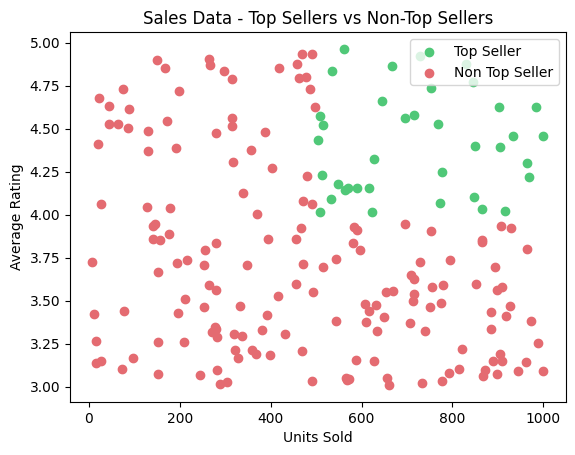

In [164]:
plt.scatter(top_seller_units_sold, top_seller_ratings, label="Top Seller", c="#50C878")
plt.scatter(non_top_seller_units_sold, non_top_seller_ratings, label="Non Top Seller", c="#e46b71")

plt.xlabel("Units Sold")
plt.ylabel("Average Rating")
plt.title("Sales Data - Top Sellers vs Non-Top Sellers")

plt.legend(loc="upper right")

In [165]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std

In [166]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [167]:
def compute_cost(X, y, w, b):
  m, n = X.shape

  cost = 0

  for i in range(m):
    z = X[i] @ w + b
    f_wb = sigmoid(z)
    cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)

  cost = cost / m

  return cost

In [168]:
def compute_gradient(X, y, w, b):
  m, n = X.shape
  dj_dw = np.zeros(w.shape)
  dj_db = 0

  for i in range(m):
    z = X[i] @ w + b
    f_wb = sigmoid(z)
    err_i = f_wb - y[i]

    for j in range(n):
      dj_dw[j] += err_i * X[i, j]

    dj_db += err_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [169]:
def gradient_descent(X, y, w_in, b_in, compute_cost, compute_gradient, alpha, num_iters,):
  m = X.shape[0]

  J_hist = []

  for i in range(num_iters):
    dj_dw, dj_db = compute_gradient(X, y, w_in, b_in)

    w_in = w_in - alpha * dj_dw
    b_in = b_in - alpha * dj_db

    cost =  compute_cost(X, y, w_in, b_in)
    J_hist.append(cost)

  return w_in, b_in, J_hist

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(2).reshape(-1,1)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.1

w, b, J_history = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()


In [ ]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = X[i] @ w + b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    ### END CODE HERE ###
    return p


In [ ]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

In [ ]:
X_test = np.array([[0, 0]])
X_test = (X_test - mean) / std

p = predict(X_test, w,b)

if p[0] == 1:
    print("Top Seller")
else:
    print("Not a top seller")